<a href="https://colab.research.google.com/github/Wambo-bit/Week3_AI-Group-Assgn/blob/main/Task_1_Scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ============================================
# 🟢 TASK 1: CLASSICAL ML (IRIS DATASET)
# ============================================

# 1️⃣ Import necessary libraries
# These libraries help us load data, train the model, and measure performance.
import pandas as pd                   # For handling data in tables
from sklearn.datasets import load_iris # To get the Iris dataset
from sklearn.model_selection import train_test_split  # To split data for training and testing
from sklearn.tree import DecisionTreeClassifier        # The ML model we'll use
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# 2️⃣ Load the dataset
# The Iris dataset contains 150 samples of iris flowers, with 4 features each.
iris = load_iris()

# Convert the data into a pandas DataFrame for easy viewing
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target  # Add the target column (species labels)

# Let's take a quick look at the first 5 rows
print("Preview of the dataset:")
print(df.head())

Preview of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [ ]:
# 3️⃣ Check for missing values
# This helps us confirm that the data is clean before training
print("\nChecking for missing values:")
print(df.isnull().sum())



Checking for missing values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [ ]:
# 4️⃣ Separate the features (X) and target labels (y)
X = df.drop('species', axis=1)  # Features: flower measurements
y = df['species']               # Target: iris species type

In [ ]:
# 5️⃣ Split the data into training and testing sets
# We use 80% for training and 20% for testing to evaluate performance later
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nData split complete:")
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")



Data split complete:
Training samples: 120, Testing samples: 30


In [ ]:
# 6️⃣ Initialize the Decision Tree Classifier
# 'criterion' defines how the tree decides splits ('gini' or 'entropy')
model = DecisionTreeClassifier(criterion='entropy', random_state=42)


In [ ]:
# 7️⃣ Train (fit) the model on the training data
model.fit(X_train, y_train)
print("\nModel training complete!")



Model training complete!


In [ ]:
# 8️⃣ Make predictions on the test data
y_pred = model.predict(X_test)

In [ ]:
# 9️⃣ Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # weighted handles multiple classes
recall = recall_score(y_test, y_pred, average='weighted')

print("\n📊 MODEL PERFORMANCE:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


📊 MODEL PERFORMANCE:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00


In [ ]:
# 10️⃣ Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# 11️⃣ Bonus: View the most important features
print("\nFeature Importance (which features influence predictions most):")
feature_importances = pd.Series(model.feature_importances_, index=iris.feature_names)
print(feature_importances.sort_values(ascending=False))


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Feature Importance (which features influence predictions most):
petal length (cm)    0.895406
petal width (cm)     0.090107
sepal width (cm)     0.014487
sepal length (cm)    0.000000
dtype: float64


<Figure size 500x400 with 0 Axes>

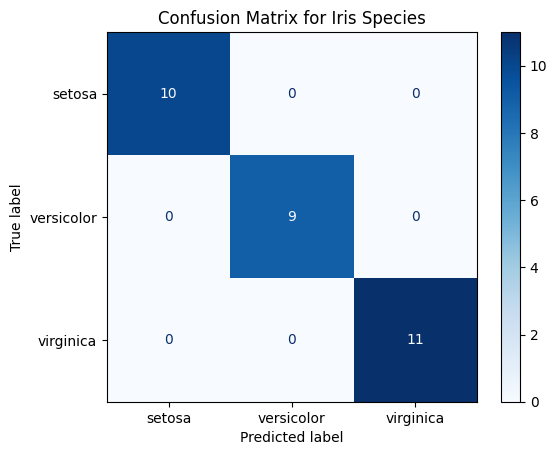

In [ ]:
# ============================================
# 🌸 VISUALIZATIONS
# ============================================

# 1️⃣ Confusion Matrix — shows how well the model classified each species
plt.figure(figsize=(5,4))
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=iris.target_names, cmap='Blues')
plt.title("Confusion Matrix for Iris Species")
plt.show()




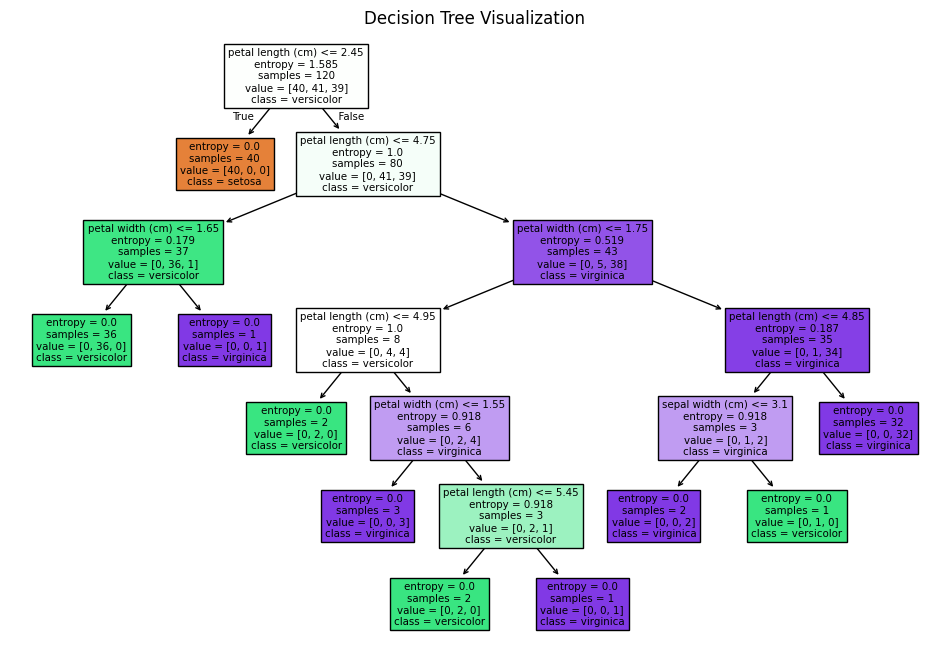

In [ ]:
# 2️⃣ Visualize the Decision Tree (simplified)
plt.figure(figsize=(12,8))
tree.plot_tree(model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree Visualization")
plt.show()